In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
import h5py
import random
import pickle as pkl
import os
import torch
sys.path.append('/extra/yadongl10/BIG_sandbox/SparseImageFlows/SMAF')
import data_loader
import imp
imp.reload(data_loader)
from torch.distributions import Normal, Bernoulli
import h5py
import numpy as np
# import utils
from data_loader import load_LAGAN, load_data_LAGAN
from plot_utils import discrete_mass, discrete_pt, ChiSquareTest
import seaborn as sns
from scipy.stats import wasserstein_distance


In [7]:
image = load_data_LAGAN(subset='background')
img_dir = "/baldig/physicsprojects/lagan"
with h5py.File(img_dir+'/lagan_data.h5', 'r') as f:
#     samples_lagan = np.asarray(f['lagan_generated_signal_images'])
    samples_lagan = np.asarray(f['lagan_generated_bg_images'])
print('samples lagan shape', samples_lagan.shape)   

(436333, 25, 25) (436333, 25, 25)
return background
samples lagan shape (20000, 25, 25)


# 1. Transform and create one-hot image dataset

In [12]:
# quantize dataset to [0,1,...,300]
image = load_data_LAGAN(subset='background')  # signal
bins = np.linspace(0,284,285)
inds = np.digitize(image, bins)
quantized_image = np.digitize(image, bins, right=False) - 1

In [3]:
img_dir = "/baldig/physicsprojects/lagan"
with h5py.File(img_dir+'/lagan_data.h5', 'r') as f:
#     samples_lagan = np.asarray(f['lagan_generated_signal_images'])
    samples_lagan = np.asarray(f['lagan_generated_bg_images'])
print('samples lagan shape', samples_lagan.shape)   

samples lagan shape (20000, 25, 25)


In [2]:
# img_dir = "/baldig/physicsprojects/lagan"
# with h5py.File(img_dir + '/discretized_lagan.h5', 'w') as f:
#     f.create_dataset('signal', data=quantized_image)
img_dir = "/baldig/physicsprojects/lagan"
with h5py.File(img_dir + '/discretized_lagan.h5', 'a') as f:
    f.create_dataset('background', data=quantized_image)

NameError: name 'quantized_image' is not defined

In [11]:
image.max(), image.min(), image.mean()

(284.67654, 0.0, 0.44451484)

In [13]:
quantized_image.max(), quantized_image.min(), quantized_image.mean()

(284, 0, 0.41092748520052347)

##  check saved data

In [652]:
# check saved data
img_dir = "/baldig/physicsprojects/lagan"
with h5py.File(img_dir + '/discretized_lagan.h5', 'r') as f:
    for i in f:
        print(i)
    image = np.asarray(f['signal'])
image.max()



background
concatenate
signal


276

In [61]:
image = load_data_LAGAN(subset='background')

(436333, 25, 25) (436333, 25, 25)
return background


# Check center pixels

In [141]:
n=10000
masked_image = np.zeros_like(image[:n,:,:])
masked_image[:, 4:21, 4:21] = image[:n, 4:21, 4:21]
# masked_image[:, 17:20, 11:14] = image[:n, 17:20, 11:14]

masked_mass, masked_pt = discrete_mass(masked_image), discrete_pt(masked_image)


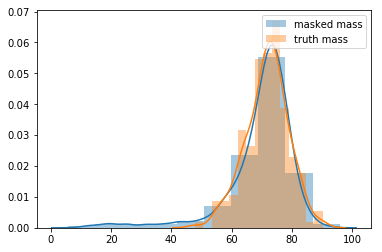

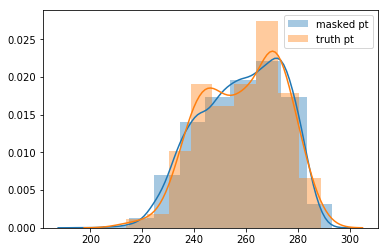

In [142]:
sns.distplot(masked_mass, bins=10, label='masked mass')
sns.distplot(mass,label='truth mass')
plt.legend(loc='upper right')
plt.show()

sns.distplot(masked_pt, bins=10, label='masked pt')
sns.distplot(pt,label='truth pt')
plt.legend(loc='upper right')
plt.show()


In [705]:
mass, pt = discrete_mass(image), discrete_pt(image)
mass.shape, pt.shape, image.shape

In [739]:
mass.max(), pt.max()

(90.321395481534125, 288.91555121839303)

In [719]:
with h5py.File(img_dir + '/discretized_lagan.h5', 'a') as f:
    concatenate = np.concatenate([np.stack([mass, pt],axis=1), image.reshape(-1, 625)], axis=1)
    f.create_dataset('concatenate', data = concatenate)
print(concatenate.shape)

(436333, 627)


# 2. Load trained model

In [6]:
with open(sampledir+'/Mix_discretized_sample_250.pkl', 'rb') as f:
    x = pkl.load(f)
metric = np.asarray(x)[:, :2]
mass_learned = metric[:,0]
pt_learned = metric[:,1]

print('learned pt distance', wasserstein_distance(discrete_pt(image[:200]), pt_learned))
print('learned mass distance', wasserstein_distance(discrete_mass(image[:200]), mass_learned))

learned pt distance 2.36305933284
learned mass distance 1.3459274839


(array([  1.,   5.,   8.,  21.,  23.,  55.,  48.,  25.,  11.,   3.]),
 array([ 47.8021283 ,  52.05405502,  56.30598173,  60.55790845,
         64.80983517,  69.06176189,  73.31368861,  77.56561533,
         81.81754204,  86.06946876,  90.32139548]),
 <a list of 10 Patch objects>)

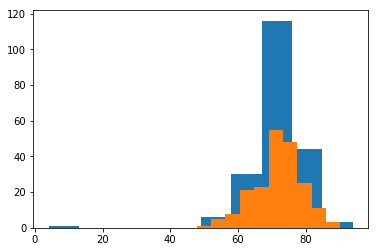

In [806]:
plt.hist(metric[:,0], bins=10)
plt.hist(mass, bins=10)

(array([  2.,   1.,  10.,  30.,  28.,  26.,  25.,  41.,  27.,  10.]),
 array([ 213.55144439,  221.08785507,  228.62426575,  236.16067644,
         243.69708712,  251.2334978 ,  258.76990849,  266.30631917,
         273.84272985,  281.37914054,  288.91555122]),
 <a list of 10 Patch objects>)

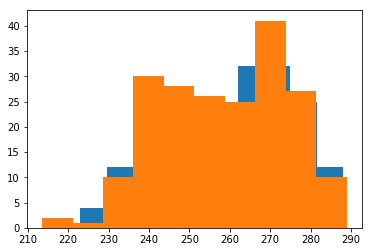

In [807]:
plt.hist(metric[:,1])
plt.hist(pt)

In [14]:
# sampledir = '/extra/yadongl10/BIG_sandbox/SparseImageFlows_result/lagan_pixelcnn/Mixture'

sampledir = '/extra/yadongl10/BIG_sandbox/SparseImageFlows_result' +\
'/bg/0210_bg_multi_9_5_batch128_reshapenorm_GeLU_const_lr/lr_1e-4_act_GeLU_latent_5_spiral'
# '/bg/multi_9_5_batch128_reshapenorm_GeLU_const_lr_1e-4/lr_1e-4_act_GeLU_latent_5_spiral'
# '/bg/0210_bg_multi_9_5_batch128_plainsoftmax_GeLU_const_lr/lr_1e-5_act_GeLU_latent_5_spiral/'


# 

with open(sampledir+'/background_Mix_discretized_sample_55.pkl', 'rb') as f:
    x = pkl.load(f)
sample_sg = np.asarray(x)[:, :].reshape(-1, 25, 25)
print(sample_sg.shape, sample_sg.max(), sample_sg.min())

(200, 25, 25) 158.622543335 0.0


0.426792994762
overall sparsity: truth and samples: 0.872046749615546 0.945056


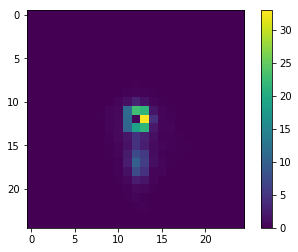

In [15]:
plt.imshow(sample_sg.mean(axis=0))
plt.colorbar()
print(sample_sg.mean())
print('overall sparsity: truth and samples:',
      np.where(image.ravel()==0)[0].shape[0] / image.ravel().shape[0],
      np.where(sample_sg.ravel()==0)[0].shape[0] / sample_sg.ravel().shape[0])

In [16]:
pixel_bg.max()

261.0

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

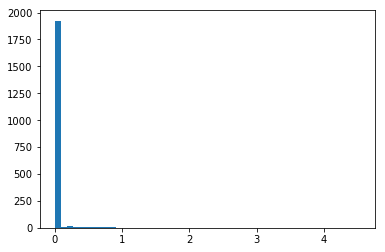

In [192]:
plt.hist(pixel_bg,bins=50)
pixel_bg

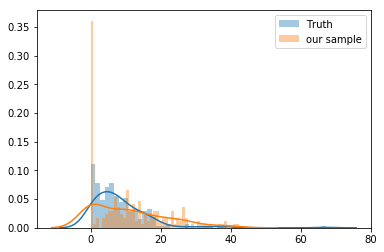

In [20]:
import seaborn as sns 
x=12
y=11
n = 200

pixel_bg = sample_sg[:,x,y]
pixel = image[:200,x,y]
x = np.linspace(0.0,200,1000)
sns.distplot(pixel, label='Truth', bins=50)
sns.distplot(pixel_bg, label='our sample', bins=50)
plt.legend()


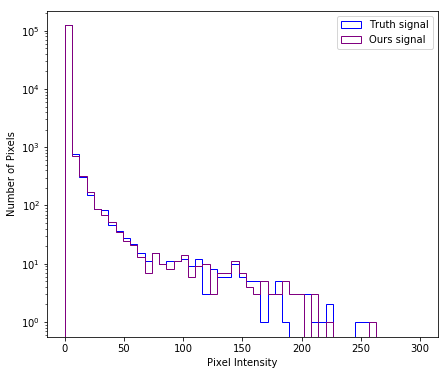

In [10]:
fig, ax = plt.subplots(figsize=(7, 6))

_, bins, _ = plt.hist(image[:200].ravel(), 
           bins=np.linspace(0,300,50), histtype='step', label='Truth signal', color='blue')

_, bins, _ = plt.hist(sample_sg.ravel(),  # to make sure have same amount of samples
           bins=np.linspace(0,300,50), histtype='step', label='Ours signal', color='purple')


plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.yscale('log')
plt.legend(loc='upper right')

# 3. Transform generated one-hot image to real value

# 4. Compare statistics (mass, pt)

In [366]:
# add noise
print(sample_sg.shape)
uniform_noise = np.zeros_like(sample_sg)
uniform_noise[:,11:14, 11:14] = 2*np.random.uniform(0,1,(200, 3,3))
sample_sg_add_uniform = sample_sg+uniform_noise

(200, 25, 25)


In [383]:
wasserstein_distance(discrete_pt(image[:n]), discrete_pt(sample_sg)),  wasserstein_distance(discrete_mass(image[:n]), discrete_mass(sample_sg))



(11.411860835368532, 5.4562348348005365)

In [368]:
bins = 15
# real image
print('n', n)
mass, pt = discrete_mass(image[2*n:3*n]), discrete_pt(image[2*n:3*n])
chi2 = ChiSquareTest(bins=bins, truth=(mass, pt))
count_truth = chi2.expectation

# ours 
mass_ours, pt_ours = discrete_mass(sample_sg_add_uniform), discrete_pt(sample_sg_add_uniform)
distance_ours, count_ours = chi2.getChisquare((mass_ours, pt_ours)) #mass_learned, pt_learned

# lagan
mass_lagan, pt_lagan = discrete_mass(samples_lagan[:n]), discrete_pt(samples_lagan[:n])
distance_lagan, count_lagan = chi2.getChisquare((mass_lagan, pt_lagan))
print(distance_ours, distance_lagan) 

print('learned pt distance, ours (addnoise) vs. lagan', wasserstein_distance(discrete_pt(image[:n]), pt_ours),  wasserstein_distance(discrete_pt(image[:n]), pt_lagan))
print('learned mass distance, ours (addnoise) vs. lagan', wasserstein_distance(discrete_mass(image[:n]), mass_ours), wasserstein_distance(discrete_mass(image[:n]), mass_lagan))



n 200
257.416666667 326.5
learned pt distance, ours (addnoise) vs. lagan 2.40495313 3.51526336397
learned mass distance, ours (addnoise) vs. lagan 1.89122181483 2.24858879325


In [160]:
# ours plus noise
noise = 0.1*np.random.normal(size=(sample_sg.shape[0], 25,25))
samples_addnoise = sample_sg + noise
samples_addnoise = samples_addnoise#.clip(min=0)
mass_ours_an, pt_ours_an = discrete_mass(samples_addnoise), discrete_pt(samples_addnoise)
print('pt distance',  wasserstein_distance(discrete_pt(image[:n]), pt_ours_an))
print('learned mass distance', wasserstein_distance(discrete_mass(image[:n]), mass_ours_an))

pt distance 10.1233173163
learned mass distance 1.88902621663


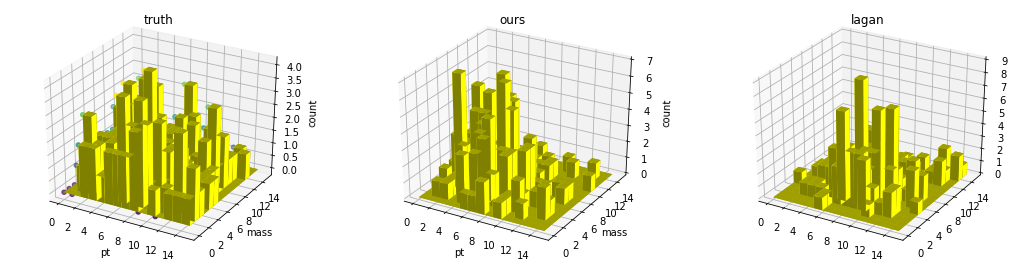

In [257]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18, 4.5))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

_x = np.arange(bins)
_y = np.arange(bins)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
bottom = np.zeros_like(x)
width = depth = 1

ax1.scatter(x,y,count_truth.ravel(), c=count_truth.ravel())
ax1.bar3d(x, y, bottom, width, depth, count_truth.ravel(), color="yellow")
ax2.bar3d(x, y, bottom, width, depth, count_ours.ravel(), color="yellow")
ax3.bar3d(x, y, bottom, width, depth, count_lagan.ravel(), color="yellow")

ax1.set_title('truth')
ax2.set_title('ours')
ax3.set_title('lagan')

for ax in [ax1, ax2]:
#     ax.set_zlim((0,20))
    ax.set_xlabel('pt')
    ax.set_ylabel('mass')
    ax.set_zlabel('count')

plt.show()

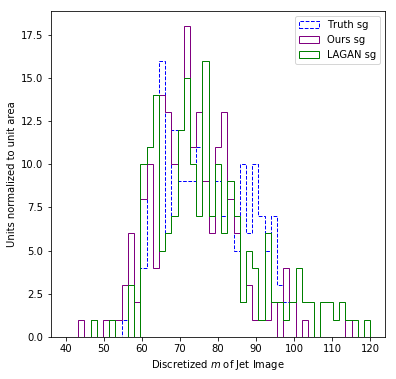

In [363]:
n=200
assert n == sample_sg.shape[0]
fig, ax = plt.subplots(figsize=(6, 6))
bins = np.linspace(40, 120, 50)
mass_image, _, _ = plt.hist(discrete_mass(image[:n]), 
             bins=bins, histtype='step', label=r'Truth sg', normed=False, color='blue', linestyle='dashed')
mass_samples, _, _ = plt.hist(discrete_mass(sample_sg_add_uniform), 
             bins=bins, histtype='step', label=r'Ours sg', normed=False, color='purple', linestyle='solid')
mass_lagan, _, _ = plt.hist(discrete_mass(samples_lagan[:n]), 
             bins=bins, histtype='step', label=r'LAGAN sg', normed=False, color='green', linestyle='solid')
plt.xlabel(r'Discretized $m$ of Jet Image')
plt.ylabel(r'Units normalized to unit area')
plt.legend()
# plt.ylim(0, 0.11)


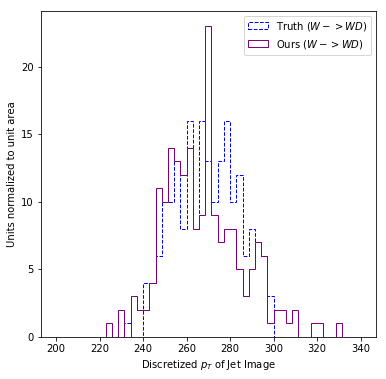

In [364]:
fig, ax = plt.subplots(figsize=(6, 6))
bins = np.linspace(200, 340, 50)

pt_image, _, _ = plt.hist(discrete_pt(image[:200]), 
             bins=bins, histtype='step', label=r'Truth ($W->WD$)', normed=False, color='blue', linestyle='dashed')
pt_samples, _, _ = plt.hist(discrete_pt(sample_sg_add_uniform), 
             bins=bins, histtype='step', label=r'Ours ($W->WD$)', normed=False, color='purple')
plt.xlabel(r'Discretized $p_T$ of Jet Image')
plt.ylabel(r'Units normalized to unit area')
plt.legend()
# plt.ylim(0, 0.045)


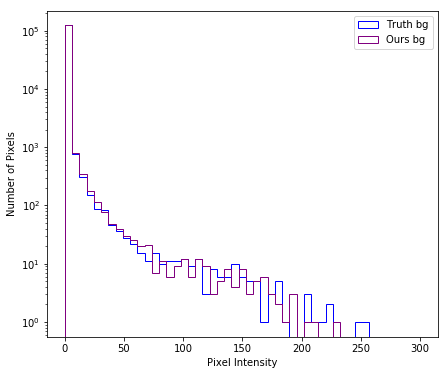

In [255]:
fig, ax = plt.subplots(figsize=(7, 6))

_, bins, _ = plt.hist(image[:n].ravel(), 
           bins=np.linspace(0,300,50), histtype='step', label='Truth bg', color='blue')

_, bins, _ = plt.hist(sample_sg_add_uniform.ravel(),  # to make sure have same amount of samples
           bins=np.linspace(0,300,50), histtype='step', label='Ours bg', color='purple')


plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.yscale('log')
plt.legend(loc='upper right')

# Plot used by Paper

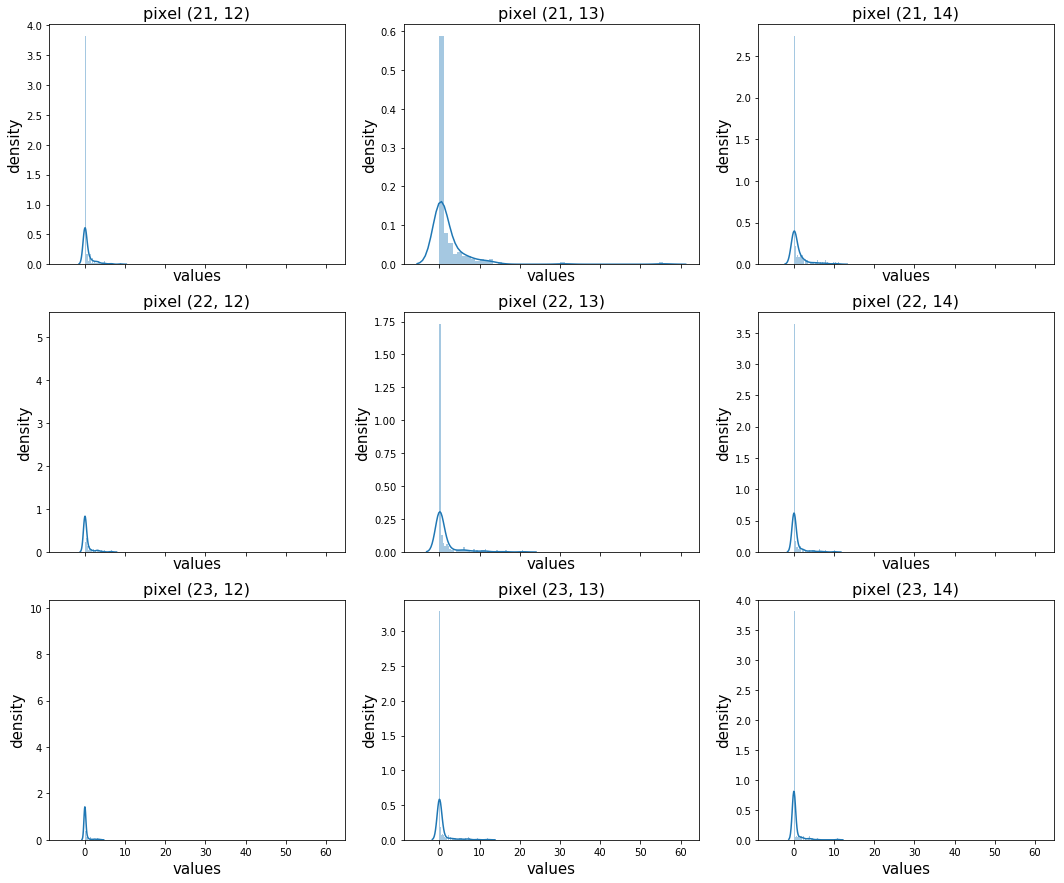

In [262]:
# signal
f, axes = plt.subplots(3, 3, figsize=(18, 15), sharex=True)
for i in range(3):
    for j in range(3):
        pixel = image[:n,i+20,j+11]
        sns.distplot(pixel, label='Truth', bins=50, ax=axes[i, j])
        axes[i,j].set_title('pixel {}'.format((i+21,j+12)), fontsize=16)
for ax in axes.flat:
    ax.set_xlabel('values', fontsize=15)
    ax.set_ylabel('density', fontsize=15)
#     ax.set(xlabel='values', ylabel='density')

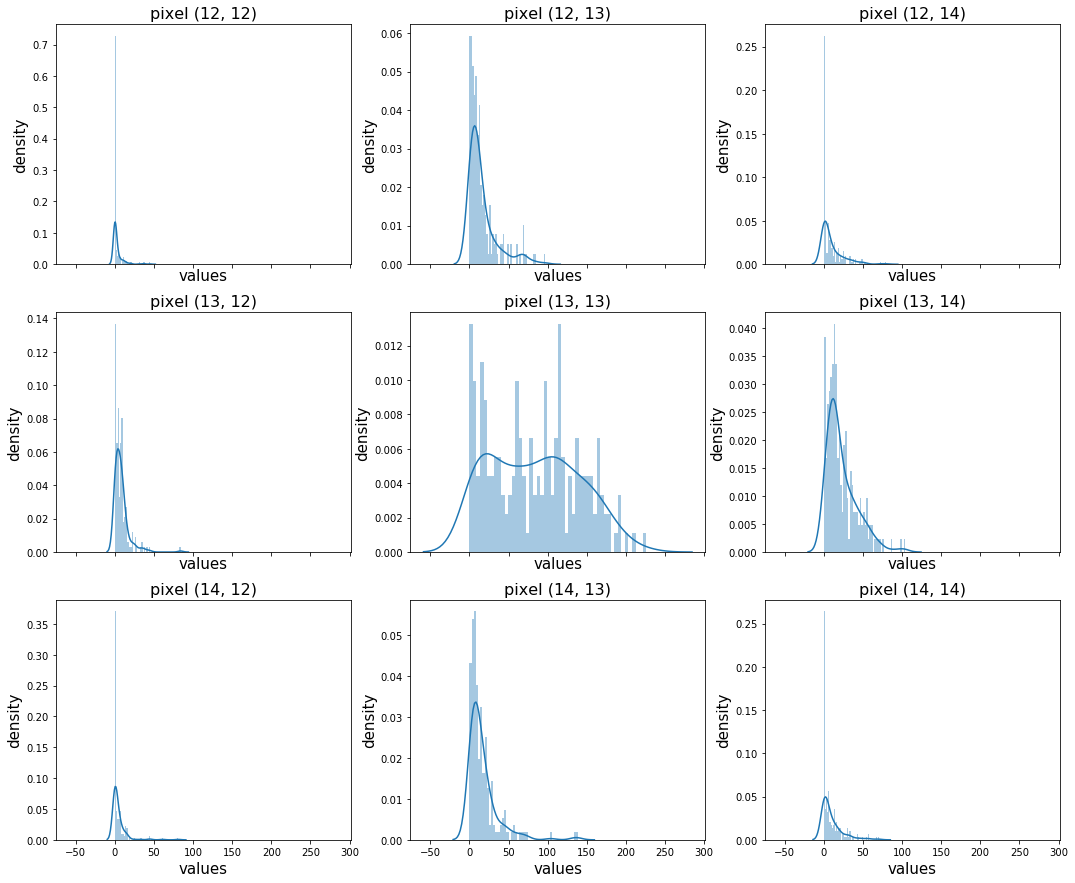

In [150]:
# background
f, axes = plt.subplots(3, 3, figsize=(18, 15), sharex=True)
for i in range(3):
    for j in range(3):
        pixel = sample_sg[:n,i+11,j+11]
        sns.distplot(pixel, label='Truth', bins=50, ax=axes[i, j])
        axes[i,j].set_title('pixel {}'.format((i+12,j+12)), fontsize=16)
for ax in axes.flat:
    ax.set_xlabel('values', fontsize=15)
    ax.set_ylabel('density', fontsize=15)
#     ax.set(xlabel='values', ylabel='density')


# load models to generate bg